# New Section

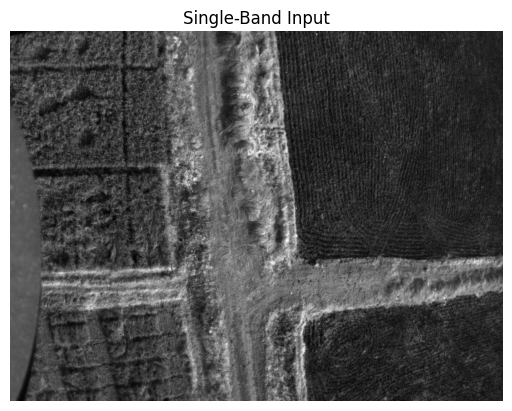

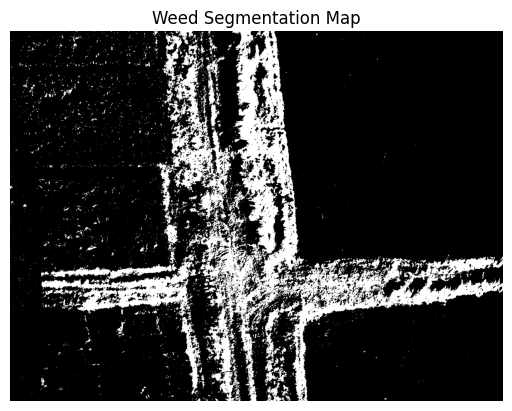

In [ ]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

# Load the single-band image
image = tifffile.imread("image.TIF")

# Visualize the image
plt.imshow(image, cmap="gray")
plt.title("Single-Band Input")
plt.axis("off")
plt.show()

# Thresholding to segment weeds (e.g., high-reflectance areas)
threshold = np.mean(image) + np.std(image)
binary = image > threshold

plt.imshow(binary, cmap="gray")
plt.title("Weed Segmentation Map")
plt.axis("off")
plt.show()


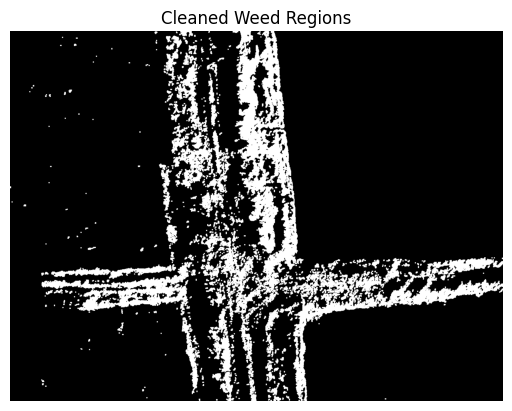

In [ ]:
from scipy.ndimage import binary_opening

# Remove small noise
cleaned = binary_opening(binary, structure=np.ones((3, 3)))

plt.imshow(cleaned, cmap="gray")
plt.title("Cleaned Weed Regions")
plt.axis("off")
plt.show()


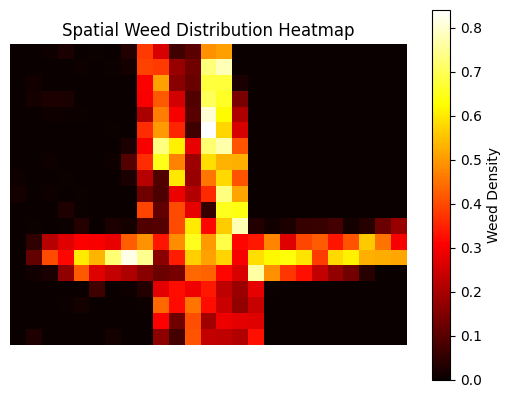

In [ ]:
from skimage.util import view_as_blocks

# Break image into 50x50 blocks and compute density
block_size = 50
h, w = cleaned.shape
blocks = view_as_blocks(cleaned[:h - h % block_size, :w - w % block_size], block_shape=(block_size, block_size))
density_map = np.mean(blocks, axis=(2, 3))  # Average weed presence per block

plt.imshow(density_map, cmap="hot")
plt.colorbar(label="Weed Density")
plt.title("Spatial Weed Distribution Heatmap")
plt.axis("off")
plt.show()


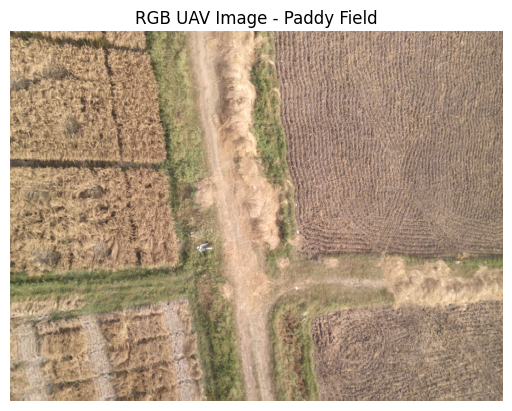

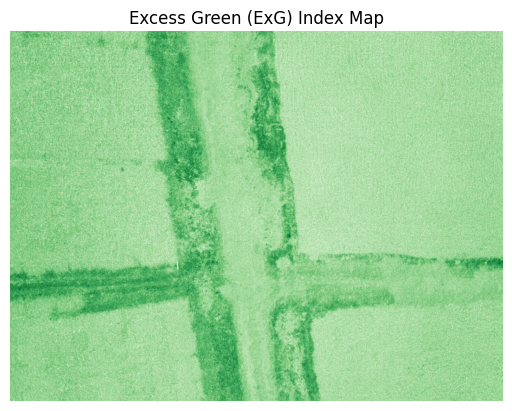

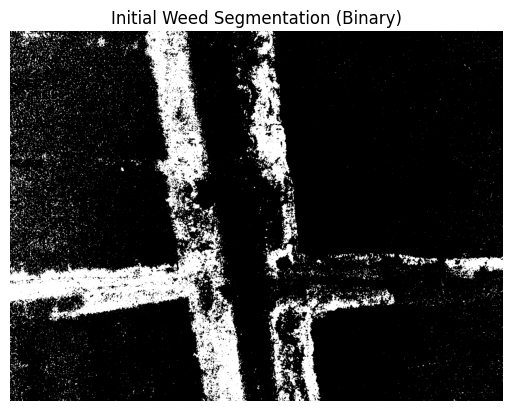

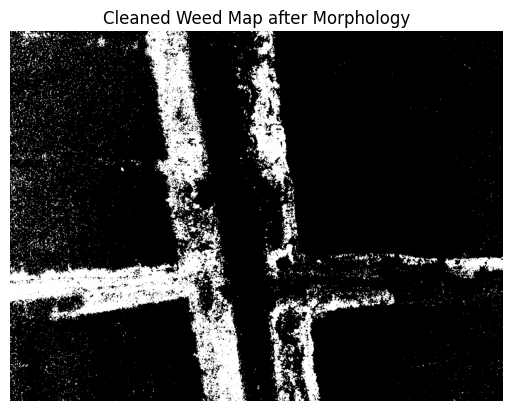

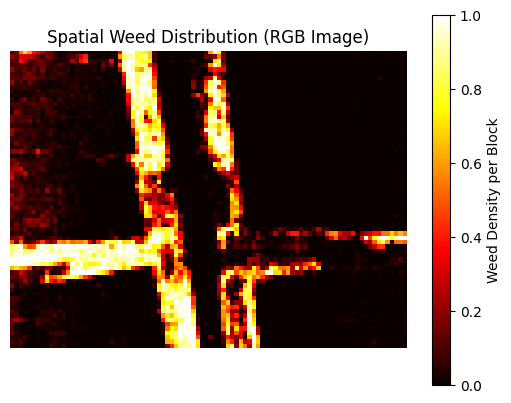

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_opening
from skimage.util import view_as_blocks

# 1. Load the RGB image
image_rgb = cv2.imread("image.JPG")
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# 2. Show the RGB image
plt.imshow(image_rgb)
plt.title("RGB UAV Image - Paddy Field")
plt.axis("off")
plt.show()

# 3. Calculate Excess Green Index (ExG) for weed segmentation
R = image_rgb[:, :, 0].astype(float)
G = image_rgb[:, :, 1].astype(float)
B = image_rgb[:, :, 2].astype(float)

ExG = 2 * G - R - B

# Normalize ExG for visualization
ExG_norm = (ExG - np.min(ExG)) / (np.max(ExG) - np.min(ExG))

plt.imshow(ExG_norm, cmap="Greens")
plt.title("Excess Green (ExG) Index Map")
plt.axis("off")
plt.show()

# 4. Thresholding to create binary weed map
threshold = np.mean(ExG) + np.std(ExG)
binary_weed = ExG > threshold

plt.imshow(binary_weed, cmap="gray")
plt.title("Initial Weed Segmentation (Binary)")
plt.axis("off")
plt.show()

# 5. Clean noise using morphological operations
cleaned_weed = binary_opening(binary_weed, structure=np.ones((3, 3)))

plt.imshow(cleaned_weed, cmap="gray")
plt.title("Cleaned Weed Map after Morphology")
plt.axis("off")
plt.show()

# 6. Spatial Distribution - Break into blocks and compute weed density
block_size = 50
h, w = cleaned_weed.shape
blocks = view_as_blocks(cleaned_weed[:h - h % block_size, :w - w % block_size], block_shape=(block_size, block_size))
density_map = np.mean(blocks, axis=(2, 3))

plt.imshow(density_map, cmap="hot")
plt.colorbar(label="Weed Density per Block")
plt.title("Spatial Weed Distribution (RGB Image)")
plt.axis("off")
plt.show()


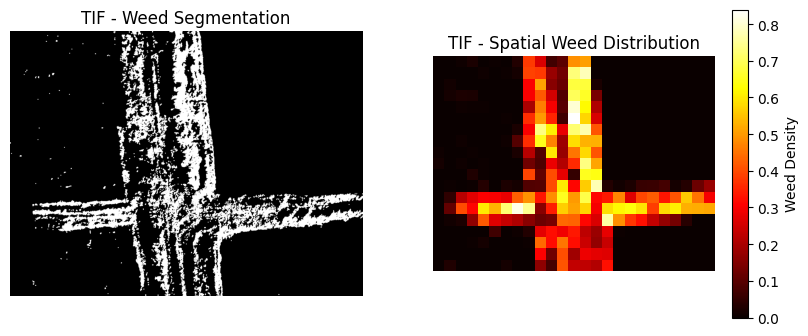

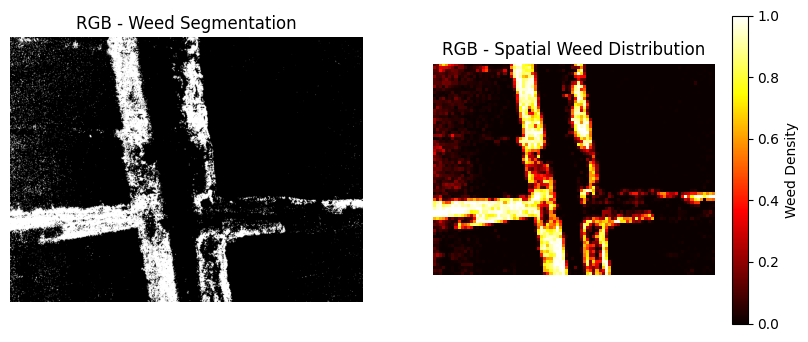

In [ ]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import binary_opening
from skimage.util import view_as_blocks

def segment_single_band(image, block_size=50):
    # Thresholding
    threshold = np.mean(image) + np.std(image)
    binary = image > threshold

    # Clean small noise
    cleaned = binary_opening(binary, structure=np.ones((3, 3)))

    # Block-wise weed density
    h, w = cleaned.shape
    blocks = view_as_blocks(cleaned[:h - h % block_size, :w - w % block_size], block_shape=(block_size, block_size))
    density_map = np.mean(blocks, axis=(2, 3))

    return cleaned, density_map

def segment_rgb(image, block_size=50):
    # Compute Excess Green (ExG) index
    image = image / 255.0  # Normalize to [0, 1]
    exg = 2 * image[:, :, 1] - image[:, :, 0] - image[:, :, 2]

    # Threshold ExG
    threshold = np.mean(exg) + np.std(exg)
    binary = exg > threshold

    # Clean small noise
    cleaned = binary_opening(binary, structure=np.ones((3, 3)))

    # Block-wise weed density
    h, w = cleaned.shape
    blocks = view_as_blocks(cleaned[:h - h % block_size, :w - w % block_size], block_shape=(block_size, block_size))
    density_map = np.mean(blocks, axis=(2, 3))

    return cleaned, density_map

# =========================
# Load images
# =========================

# Load TIF (Single-band)
tif_image = tifffile.imread("image.TIF")

# Load RGB
rgb_image = cv2.imread("image.JPG")
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# =========================
# Process Single-band
# =========================

cleaned_tif, density_tif = segment_single_band(tif_image)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cleaned_tif, cmap="gray")
plt.title("TIF - Weed Segmentation")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(density_tif, cmap="hot")
plt.colorbar(label="Weed Density")
plt.title("TIF - Spatial Weed Distribution")
plt.axis("off")
plt.show()

# =========================
# Process RGB
# =========================

cleaned_rgb, density_rgb = segment_rgb(rgb_image)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cleaned_rgb, cmap="gray")
plt.title("RGB - Weed Segmentation")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(density_rgb, cmap="hot")
plt.colorbar(label="Weed Density")
plt.title("RGB - Spatial Weed Distribution")
plt.axis("off")
plt.show()
